In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Esercitazione 10

In [19]:
Nstep=1000  #numero di step
x=np.arange(Nstep)+1  #vettore delle ascisse dei punti plottati
Nmigr=100
swap_x=np.linspace(1, Nstep-1, int(Nstep/Nmigr))
swap_y=np.zeros(swap_x.size)

## Analisi con processi non comunicanti

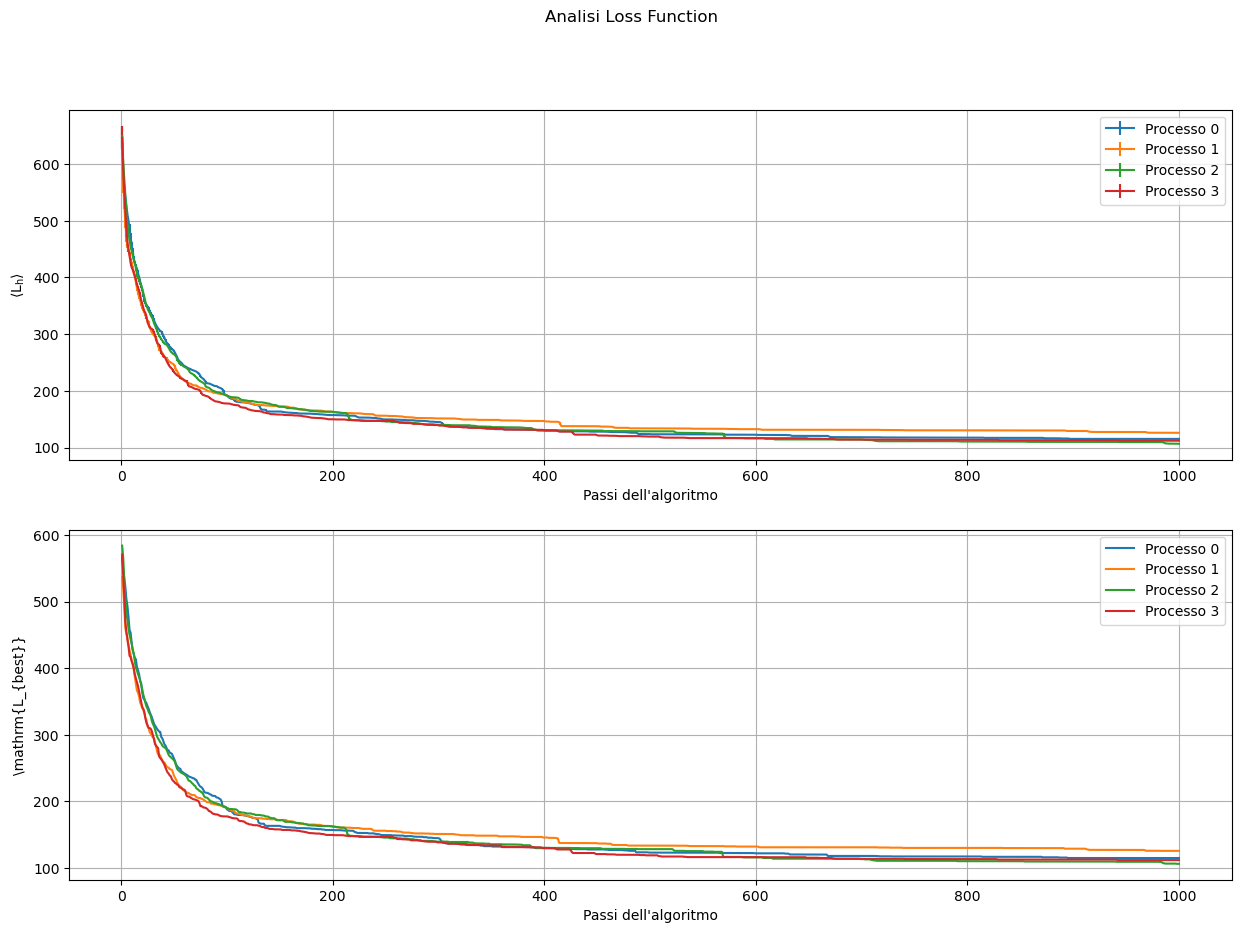

In [3]:
nc_0_bestL=np.loadtxt("NonComunicanti/bestloss_0.dat",  unpack="true")
nc_0_meanL, nc_0_errorsL=np.loadtxt("NonComunicanti/besthalfloss_0.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_1_bestL=np.loadtxt("NonComunicanti/bestloss_1.dat",  unpack="true")
nc_1_meanL, nc_1_errorsL=np.loadtxt("NonComunicanti/besthalfloss_1.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_2_bestL=np.loadtxt("NonComunicanti/bestloss_2.dat",  unpack="true")
nc_2_meanL, nc_2_errorsL=np.loadtxt("NonComunicanti/besthalfloss_2.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nc_3_bestL=np.loadtxt("NonComunicanti/bestloss_3.dat",  unpack="true")
nc_3_meanL, nc_3_errorsL=np.loadtxt("NonComunicanti/besthalfloss_3.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

nclfig ,(nclplt1, nclplt2) = plt.subplots(2, 1, figsize=(15, 10))

nclplt1.errorbar(x, nc_0_meanL, yerr=nc_0_errorsL, label="Processo 0")
nclplt1.errorbar(x, nc_1_meanL, yerr=nc_1_errorsL, label="Processo 1")
nclplt1.errorbar(x, nc_2_meanL, yerr=nc_2_errorsL, label="Processo 2")
nclplt1.errorbar(x, nc_3_meanL, yerr=nc_3_errorsL, label="Processo 3")
nclplt1.set_xlabel("Passi dell'algoritmo")
nclplt1.set_ylabel(r"$\left<\mathrm{L_h}\right>$")
nclplt1.legend()
nclplt1.grid(True)

nclplt2.plot(x, nc_0_bestL, label="Processo 0")
nclplt2.plot(x, nc_1_bestL, label="Processo 1")
nclplt2.plot(x, nc_2_bestL, label="Processo 2")
nclplt2.plot(x, nc_3_bestL, label="Processo 3")
nclplt2.set_xlabel("Passi dell'algoritmo")
nclplt2.set_ylabel(r"\mathrm{L_{best}}")
nclplt2.legend()
nclplt2.grid(True)

nclfig.suptitle("Analisi Loss Function")
plt.show()

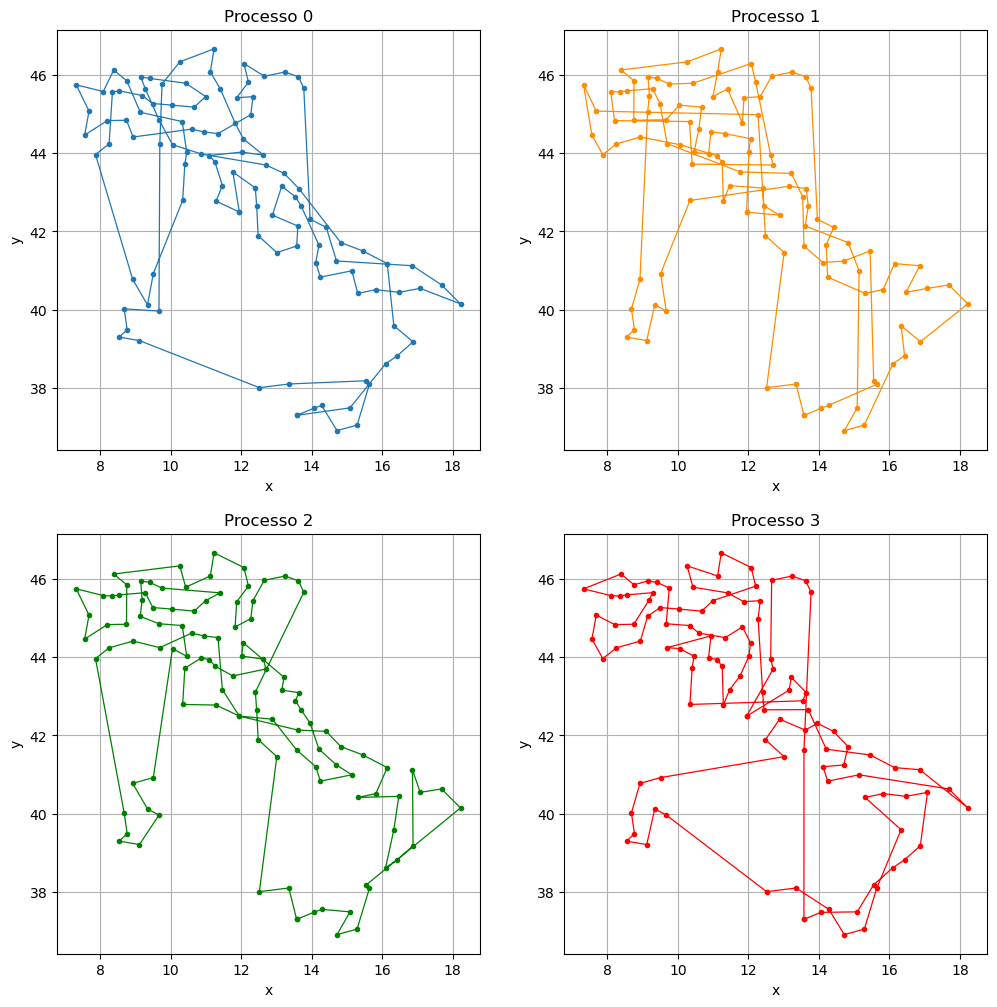

In [4]:
nc_0_x, nc_0_y=np.loadtxt("NonComunicanti/bestpath_0.dat", usecols=(0, 1), unpack="true")
nc_1_x, nc_1_y=np.loadtxt("NonComunicanti/bestpath_1.dat", usecols=(0, 1), unpack="true")
nc_2_x, nc_2_y=np.loadtxt("NonComunicanti/bestpath_2.dat", usecols=(0, 1), unpack="true")
nc_3_x, nc_3_y=np.loadtxt("NonComunicanti/bestpath_3.dat", usecols=(0, 1), unpack="true")

ncpfig, ncpplt = plt.subplots(2, 2, figsize=(12, 12))

(ncpplt1, ncpplt2), (ncpplt3, ncpplt4) = ncpplt

ncpplt1.plot(nc_0_x, nc_0_y, marker='.', linewidth=0.9)
ncpplt1.grid()
ncpplt1.set_title("Processo 0")
ncpplt1.set_xlabel("x")
ncpplt1.set_ylabel("y")

ncpplt2.plot(nc_1_x, nc_1_y, marker='.', linewidth=0.9, color='darkorange')
ncpplt2.grid()
ncpplt2.set_title("Processo 1")
ncpplt2.set_xlabel("x")
ncpplt2.set_ylabel("y")

ncpplt3.plot(nc_2_x, nc_2_y, marker='.', linewidth=0.9, color='green')
ncpplt3.grid()
ncpplt3.set_title("Processo 2")
ncpplt3.set_xlabel("x")
ncpplt3.set_ylabel("y")

ncpplt4.plot(nc_3_x, nc_3_y, marker='.', linewidth=0.9, color='red')
ncpplt4.grid()
ncpplt4.set_title("Processo 3")
ncpplt4.set_xlabel("x")
ncpplt4.set_ylabel("y")

plt.show()

## Analisi con processi comunicanti

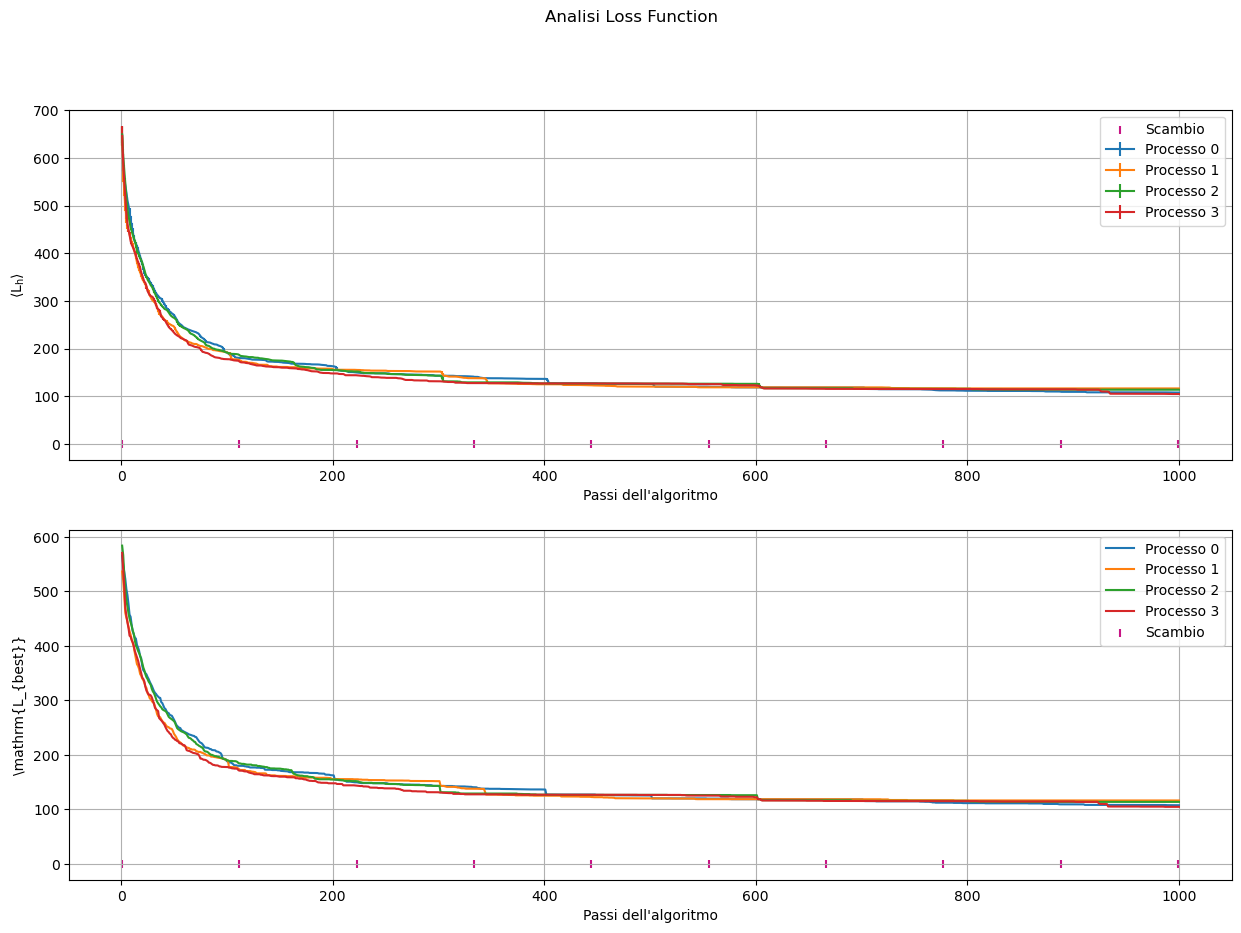

NameError: name 'Ntot' is not defined

In [25]:
c_0_bestL=np.loadtxt("Comunicanti/bestloss_0.dat",  unpack="true")
c_0_meanL, c_0_errorsL=np.loadtxt("Comunicanti/besthalfloss_0.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_1_bestL=np.loadtxt("Comunicanti/bestloss_1.dat",  unpack="true")
c_1_meanL, c_1_errorsL=np.loadtxt("Comunicanti/besthalfloss_1.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_2_bestL=np.loadtxt("Comunicanti/bestloss_2.dat",  unpack="true")
c_2_meanL, c_2_errorsL=np.loadtxt("Comunicanti/besthalfloss_2.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

c_3_bestL=np.loadtxt("Comunicanti/bestloss_3.dat",  unpack="true")
c_3_meanL, c_3_errorsL=np.loadtxt("Comunicanti/besthalfloss_3.dat", usecols=(0, 1),  unpack="true")  #vettori delle ordinate dei punti plottati e delle barre d'errore

clfig ,(clplt1, clplt2) = plt.subplots(2, 1, figsize=(15, 10))

clplt1.errorbar(x, c_0_meanL, yerr=c_0_errorsL, label="Processo 0")
clplt1.errorbar(x, c_1_meanL, yerr=c_1_errorsL, label="Processo 1")
clplt1.errorbar(x, c_2_meanL, yerr=c_2_errorsL, label="Processo 2")
clplt1.errorbar(x, c_3_meanL, yerr=c_3_errorsL, label="Processo 3")
clplt1.scatter(swap_x, swap_y, color='mediumvioletred', label='Scambio', marker='|')
clplt1.set_xlabel("Passi dell'algoritmo")
clplt1.set_ylabel(r"$\left<\mathrm{L_h}\right>$")
clplt1.legend()
clplt1.grid(True)

clplt2.plot(x, c_0_bestL, label="Processo 0")
clplt2.plot(x, c_1_bestL, label="Processo 1")
clplt2.plot(x, c_2_bestL, label="Processo 2")
clplt2.plot(x, c_3_bestL, label="Processo 3")
clplt2.scatter(swap_x, swap_y, color='mediumvioletred', label='Scambio', marker='|')
clplt2.set_xlabel("Passi dell'algoritmo")
clplt2.set_ylabel(r"\mathrm{L_{best}}")
clplt2.legend()
clplt2.grid(True)

clfig.suptitle("Analisi Loss Function")
plt.show()

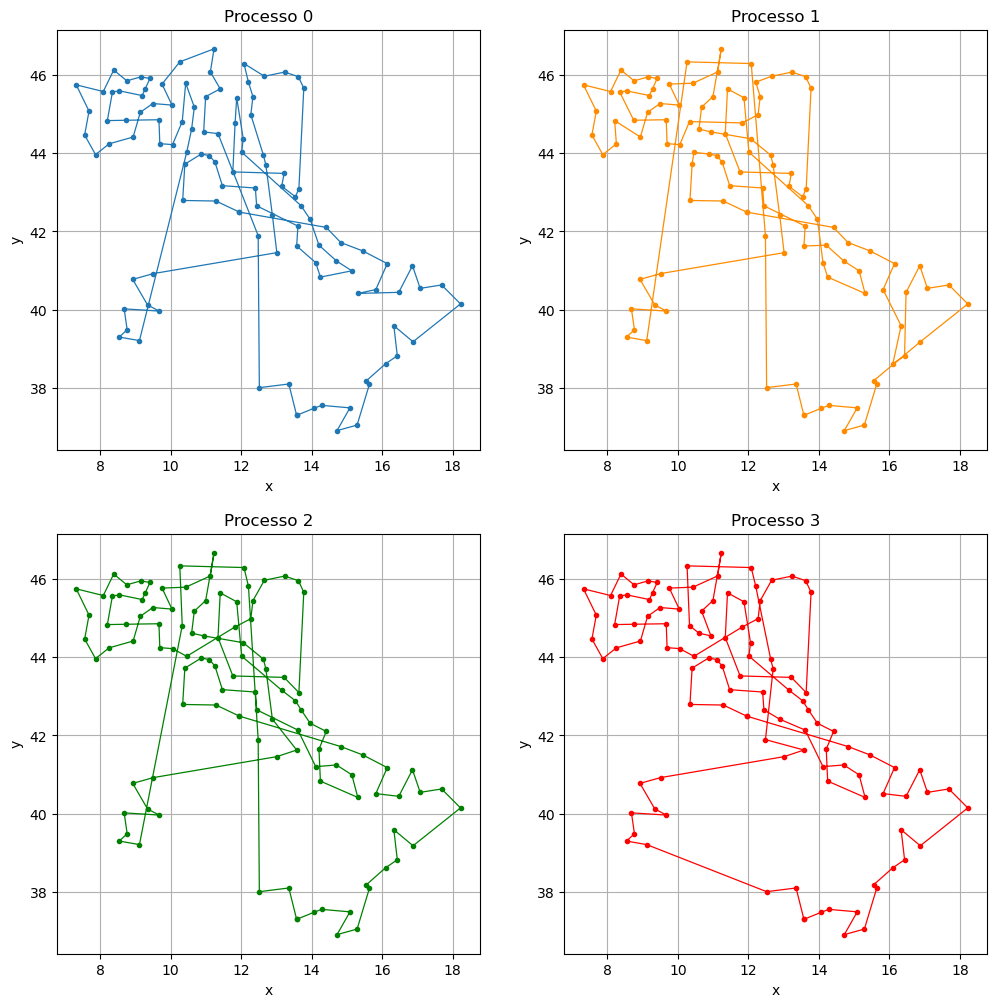

In [24]:
c_0_x, c_0_y=np.loadtxt("Comunicanti/bestpath_0.dat", usecols=(0, 1), unpack="true")
c_1_x, c_1_y=np.loadtxt("Comunicanti/bestpath_1.dat", usecols=(0, 1), unpack="true")
c_2_x, c_2_y=np.loadtxt("Comunicanti/bestpath_2.dat", usecols=(0, 1), unpack="true")
c_3_x, c_3_y=np.loadtxt("Comunicanti/bestpath_3.dat", usecols=(0, 1), unpack="true")

cpfig, cpplt = plt.subplots(2, 2, figsize=(12, 12))

(cpplt1, cpplt2), (cpplt3, cpplt4) = cpplt

cpplt1.plot(c_0_x, c_0_y, marker='.', linewidth=0.9)
cpplt1.grid()
cpplt1.set_title("Processo 0")
cpplt1.set_xlabel("x")
cpplt1.set_ylabel("y")

cpplt2.plot(c_1_x, c_1_y, marker='.', linewidth=0.9, color='darkorange')
cpplt2.grid()
cpplt2.set_title("Processo 1")
cpplt2.set_xlabel("x")
cpplt2.set_ylabel("y")

cpplt3.plot(c_2_x, c_2_y, marker='.', linewidth=0.9, color='green')
cpplt3.grid()
cpplt3.set_title("Processo 2")
cpplt3.set_xlabel("x")
cpplt3.set_ylabel("y")

cpplt4.plot(c_3_x, c_3_y, marker='.', linewidth=0.9, color='red')
cpplt4.grid()
cpplt4.set_title("Processo 3")
cpplt4.set_xlabel("x")
cpplt4.set_ylabel("y")

plt.show()

### Confronto

In [26]:
print("Best Loss processi non comunicanti:")
print("Processo 0 = ", nc_0_bestL[Nstep-1])
print("Processo 1 = ", nc_1_bestL[Nstep-1])
print("Processo 2 = ", nc_2_bestL[Nstep-1])
print("Processo 3 = ", nc_3_bestL[Nstep-1])
print("Best Loss processi comunicanti:")
print("Processo 0 = ", c_0_bestL[Nstep-1])
print("Processo 1 = ", c_1_bestL[Nstep-1])
print("Processo 2 = ", c_2_bestL[Nstep-1])
print("Processo 3 = ", c_3_bestL[Nstep-1])

Best Loss processi non comunicanti:
Processo 0 =  115.1929
Processo 1 =  125.948
Processo 2 =  106.5248
Processo 3 =  112.0512
Best Loss processi comunicanti:
Processo 0 =  107.5007
Processo 1 =  116.2416
Processo 2 =  113.5974
Processo 3 =  104.5439
